In [1]:
from mesh_dataset_utils import *
from mesh_experiment import Experiment
from MLP import MLP
import torch
from torch import nn
from sklearn.model_selection import train_test_split
from datetime import datetime
import json
import copy

In [3]:
path = 'meshes/rounderpixelcube.stl'
tm = trimesh.load(path)

In [16]:
DATASET_NAME = 'spikey_1_partial_smooth'

In [17]:
dataset = np.load(f'npz_train/{DATASET_NAME}.npz')

In [18]:
X = dataset['fourier']
y = dataset['target']

In [19]:
X.shape

(42787, 100)

In [20]:
y.shape

(42787, 3)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=11)

In [22]:
batch_size = 1000
train_data = torch.utils.data.TensorDataset(torch.tensor(X_train).float(), torch.tensor(y_train).float())
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

test_data = torch.utils.data.TensorDataset(torch.tensor(X_test).float(), torch.tensor(y_test).float())
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [32]:
model = MLP(
            input_dim=X.shape[1],
            output_dim=y.shape[1],
            hidden_dim=512,
            n_layers=6,
            geometric_init=True,
            beta=True,
            sine=True,
            all_sine=True,
            skip=True,
            bn=True,
            dropout=0.0
            )

In [33]:
lr=1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
loss_fn = nn.MSELoss()
epochs = 5
rand_inits = 3
now = datetime.now()

OUT_DIR = f'experiments/{now.strftime("%m_%d_%y_%H:%M:%S")}_{DATASET_NAME}'
model_info = {'test': 'TEST!!'}

In [34]:
OUT_DIR

'experiments/04_14_23_13:37:15_spikey_1_partial_smooth'

In [35]:
exp = Experiment(model,
                    optimizer,
                    loss_fn,
                    train_loader,
                    test_loader,
                    epochs,
                    rand_inits,
                    OUT_DIR,
                    model_info,
                    rand_seed=11)

In [36]:
log = exp.run()

started training for 5 epochs
epoch 0 training loss: 0.86609309428447 eval loss: 0.7198881506919861
started training for 5 epochs
epoch 0 training loss: 0.8503258163864548 eval loss: 0.689596951007843
started training for 5 epochs
epoch 0 training loss: 0.8510825182940509 eval loss: 0.6367077231407166


In [37]:
log

{'model': 'MLP(\n  (model): ModuleList(\n    (0): Linear(in_features=100, out_features=512, bias=True)\n    (1): Sine()\n    (2): LayerNorm((512,), eps=1e-05, elementwise_affine=True)\n    (3): Linear(in_features=512, out_features=512, bias=True)\n    (4): Sine()\n    (5): LayerNorm((512,), eps=1e-05, elementwise_affine=True)\n    (6): Linear(in_features=512, out_features=512, bias=True)\n    (7): Sine()\n    (8): LayerNorm((512,), eps=1e-05, elementwise_affine=True)\n    (9): Linear(in_features=612, out_features=512, bias=True)\n    (10): Sine()\n    (11): LayerNorm((512,), eps=1e-05, elementwise_affine=True)\n    (12): Linear(in_features=512, out_features=512, bias=True)\n    (13): Sine()\n    (14): LayerNorm((512,), eps=1e-05, elementwise_affine=True)\n    (15): Linear(in_features=512, out_features=3, bias=True)\n  )\n)',
 'optimizer': 'Adam (\nParameter Group 0\n    amsgrad: False\n    betas: (0.9, 0.999)\n    capturable: False\n    eps: 1e-08\n    foreach: None\n    lr: 0.0001\n  

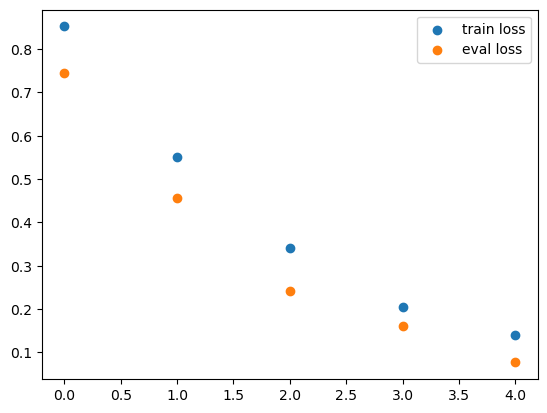

In [31]:
run_num = 2
train_loss = log['train_results'][run_num]['train_losses']
eval_loss = log['train_results'][run_num]['eval_losses']

plt.scatter(range(len(train_loss)), train_loss, label='train loss')
plt.scatter(range(len(eval_loss)), eval_loss, label='eval loss')
plt.legend()